In [170]:
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split

df = pd.read_csv('reviews.csv')

In [171]:

# Sample data
texts = df['title'].astype(str) + ', ' + df['text'].astype(str)
labels = df['is_negative']

NUMBER_OF_WORDS = 15000


# Tokenize text
tokenizer = Tokenizer(num_words=NUMBER_OF_WORDS)
tokenizer.fit_on_texts(texts)

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print(word_index)

# Pad sequences
data = pad_sequences(sequences, maxlen=250)

# Convert labels to numpy array
labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build model architecture
model = Sequential()
model.add(Embedding(input_dim=NUMBER_OF_WORDS, output_dim=256))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


{'the': 1, 'a': 2, 'of': 3, 'and': 4, 'to': 5, 'i': 6, 'is': 7, 'it': 8, 'this': 9, 'in': 10, 'that': 11, 'for': 12, 'with': 13, 'you': 14, 'on': 15, 'not': 16, 'was': 17, 'but': 18, 'as': 19, 'have': 20, 'are': 21, 'my': 22, 'be': 23, 'one': 24, 'book': 25, 'or': 26, 'so': 27, 'all': 28, 'they': 29, 'at': 30, 'if': 31, 'from': 32, 'an': 33, 'about': 34, 'he': 35, 'by': 36, 'very': 37, 'his': 38, 'just': 39, 'like': 40, 'out': 41, 'has': 42, 'good': 43, 'up': 44, 'more': 45, 'when': 46, 'great': 47, 'would': 48, 'what': 49, 'had': 50, 'there': 51, 'can': 52, 'no': 53, 'movie': 54, "it's": 55, 'will': 56, 'me': 57, 'time': 58, 'who': 59, 'did': 60, 'only': 61, 'your': 62, 'get': 63, 'some': 64, 'do': 65, 'than': 66, 'which': 67, 'them': 68, 'well': 69, 'other': 70, 'we': 71, 'even': 72, 'these': 73, "don't": 74, 'her': 75, 'after': 76, 'much': 77, 'use': 78, 'their': 79, 'film': 80, 'first': 81, 'really': 82, 'how': 83, 'read': 84, 'because': 85, 'also': 86, 'were': 87, 'any': 88, 'been

In [172]:
# Train model
history = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 238ms/step - accuracy: 0.5244 - loss: 0.6920 - val_accuracy: 0.5131 - val_loss: 0.6747
Epoch 2/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 50s 249ms/step - accuracy: 0.7237 - loss: 0.5874 - val_accuracy: 0.8075 - val_loss: 0.4599
Epoch 3/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 46s 231ms/step - accuracy: 0.8596 - loss: 0.3812 - val_accuracy: 0.8112 - val_loss: 0.4264
Epoch 4/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 48s 242ms/step - accuracy: 0.9082 - loss: 0.2656 - val_accuracy: 0.8413 - val_loss: 0.3716
Epoch 5/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 55s 277ms/step - accuracy: 0.9416 - loss: 0.1907 - val_accuracy: 0.8444 - val_loss: 0.3801
Epoch 6/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 54s 268ms/step - accuracy: 0.9545 - loss: 0.1463 - val_accuracy: 0.8481 - val_loss: 0.3812
Epoch 7/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 110s 553ms/step - accuracy: 0.9751 - loss: 0.0968 - val_accuracy: 0.8419 - val_loss: 0.3801
Epoch 8/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 55s 275ms/step - accuracy: 0.9798 - loss: 0.0811 -

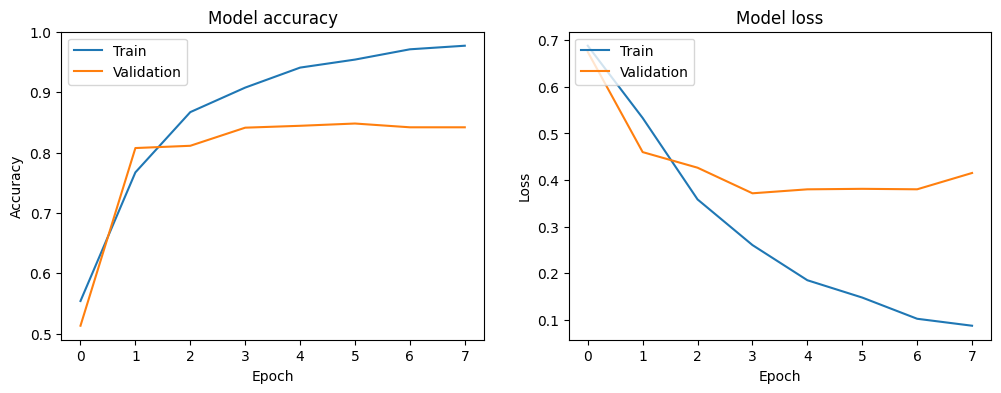

In [173]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()